In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller

In [2]:
day0 = pd.read_csv('./round2/prices_round_2_day_-1.csv', sep=";")
day1 = pd.read_csv('./round2/prices_round_2_day_0.csv', sep=";")
day2 = pd.read_csv('./round2/prices_round_2_day_1.csv', sep=";")

day0['timestamp'] = day0['timestamp'] 
day1['timestamp'] = (day1['timestamp'] + 1000000) 
day2['timestamp'] = (day2['timestamp'] + 2000000) 

In [3]:
df = pd.concat([day0, day1, day2])
df_c = df[df['product'] == "COCONUTS"]
df_p = df[df['product'] == "PINA_COLADAS"]

df_c.set_index('timestamp', inplace=True)
df_p.set_index('timestamp', inplace=True)

df_c.index = df_c.index.astype('int64')
df_p.index = df_p.index.astype('int64')

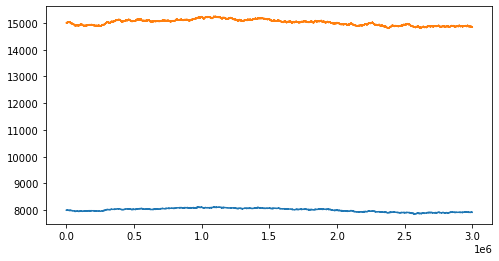

In [4]:
plt.figure(figsize=(8,4))
plt.plot(df_c['mid_price'])
plt.plot(df_p['mid_price'])

In [5]:
mu = np.mean(df_p['mid_price'].values - df_c['mid_price'].values)
var = np.var(df_p['mid_price'].values - df_c['mid_price'].values - mu)

In [6]:
coint(df_p['mid_price'].values, df_c['mid_price'].values)

(-4.167430876030964,
 0.004084654579065286,
 array([-3.89680511, -3.33633368, -3.04459138]))

In [7]:
df_p['mid_price'].corr(df_c['mid_price'])

0.9604128054367347

In [8]:
adfuller(df_p['mid_price'].values - df_c['mid_price'].values - mu)

(-2.68354445409723,
 0.07692933967820255,
 2,
 29997,
 {'1%': -3.430568017124298,
  '5%': -2.8616363576754993,
  '10%': -2.566821288250248},
 117930.57335718954)

In [9]:
adfuller(df_p['mid_price'].values / (df_c['mid_price'].values + mu))

(-2.683839212256461,
 0.0768767833146989,
 2,
 29997,
 {'1%': -3.430568017124298,
  '5%': -2.8616363576754993,
  '10%': -2.566821288250248},
 -458099.6264857068)

In [10]:
# iterate to find the best beta
results = []
for i, beta in enumerate(np.linspace(1, 5, 200)):
    result = adfuller(df_p['mid_price'].values - beta * df_c['mid_price'].values)[1]
    results.append(result)
    print(i, result)

0 0.07692933967840468
1 0.06740435275762242
2 0.05860389969512867
3 0.05054661265316918
4 0.04324031295900049
5 0.03668156333390423
6 0.030855658125677397
7 0.025737089747970066
8 0.021290495475948707
9 0.017472049266771972
10 0.014231222732639047
11 0.011512803229645777
12 0.009259030878873364
13 0.007411704925437084
14 0.0059141158151403
15 0.004712682467670553
16 0.0037582110647246883
17 0.0030067363037695203
18 0.0024199512469103733
19 0.0019652707069827626
20 0.0016156004970811024
21 0.0013488985586109286
22 0.0011476146326378802
23 0.0009980856868207343
24 0.0008899488685005509
25 0.0008156164531411113
26 0.0007698413699473129
27 0.000749389406160664
28 0.0007528258224156952
29 0.0007804195248875608
30 0.0008341661165521099
31 0.0009179306826216729
32 0.0010377104777061913
33 0.001202015192055734
34 0.0014223567701094255
35 0.0017138308520380438
36 0.002095757601161398
37 0.002592331918529576
38 0.0032332141999300685
39 0.004053976588060409
40 0.005096310667218222
41 0.0064079051

In [11]:
beta = np.linspace(1, 5, 200)[27]

In [12]:
adfuller(df_p['mid_price'].values - beta * df_c['mid_price'].values)

(-4.166855776370202,
 0.000749389406160664,
 2,
 29997,
 {'1%': -3.430568017124298,
  '5%': -2.8616363576754993,
  '10%': -2.566821288250248},
 115662.40851181776)

In [13]:
mu = np.mean(df_p['mid_price'].values - beta * df_c['mid_price'].values)
var = np.var(df_p['mid_price'].values - beta * df_c['mid_price'].values - mu)

In [14]:
# the alpha
mu

2661.3068421273024

In [15]:
# the standard deviation
np.sqrt(var)

30.536447127592428

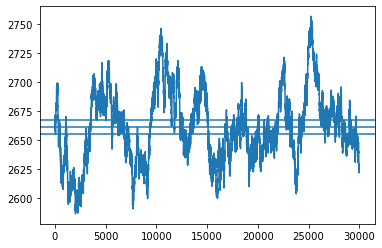

In [16]:
# tune the parameters
plt.plot(df_p['mid_price'].values - beta * df_c['mid_price'].values)
plt.axhline(mu+0.2*np.sqrt(var))
plt.axhline(mu)
plt.axhline(mu-0.2*np.sqrt(var))